In [7]:
# Imports

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Make Python scripts available to Jupyter notebook
%run helper_functions

In [8]:
# Get data set

# Set Path
file_name = 'diabetes_data.csv'
file_path = refactor_path(f"{os.getcwd()}/Data_Sets/{file_name}")

# Convert Pandas dataframe
df = pd.read_csv(file_path)


In [9]:
# Explore data set

# Display dataframe
print(f"DataFrame:\n{df}")

# Display summary
print(f"\nSummary:")
df.info()

# Display statistics
print(f"\nStatistics:")
df.describe(include='all')


DataFrame:
     glucose  bloodpressure  diabetes
0         40             85         0
1         40             92         0
2         45             63         1
3         45             80         0
4         40             73         1
..       ...            ...       ...
990       45             87         0
991       40             83         0
992       40             83         0
993       40             60         1
994       45             82         0

[995 rows x 3 columns]

Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB

Statistics:


,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [11]:
# Set the features and the label

# Label
y_label_name = 'diabetes'
y_label_classes = df[y_label_name].unique()
print(f"y_label_classes: {y_label_classes}")

# Features
x_feature_names = list(df.columns)
x_feature_names.remove(y_label_name)
print(f"x_feature_names: {x_feature_names}")

# Convert to NumPy arrays
np_x_feature = df[x_feature_names].to_numpy() 
np_y_label = df[y_label_name].to_numpy()

y_label_classes: [0 1]
x_feature_names: ['glucose', 'bloodpressure']


In [12]:
# Set training variables
test_size=0.25
random_state=0

In [13]:
# Model Full Set

# Train
model = GaussianNB().fit(np_x_feature, np_y_label)

# Predict
y_predict = model.predict(np_x_feature)

# Evaluate
accuracy = accuracy_score(np_y_label, y_predict)
cm = confusion_matrix(np_y_label, y_predict)
print(f"accuracy: {accuracy}")
print(f"cm: {cm}")



accuracy: 0.9336683417085427
cm: [[463  34]
 [ 32 466]]


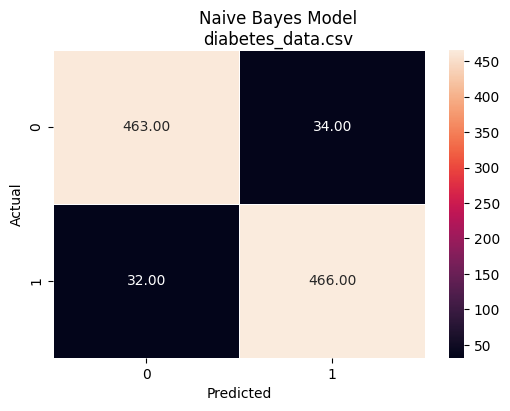

In [14]:
# Visualize
fig = plt.figure(figsize=(6,4))
fig.suptitle(f"Naive Bayes Model\n{file_name}")
ax = sns.heatmap(cm, annot=True, fmt=".2f", linewidth=.5)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(y_label_classes)
ax.set_yticklabels(y_label_classes)
plt.show()

In [15]:
# Model Split Set

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(np_x_feature, np_y_label, test_size=test_size, random_state=random_state)

# Train
model_split = GaussianNB().fit(x_train, y_train)

# Predict
y_predict_split = model_split.predict(x_test)

# Evaluate
accuracy_split = accuracy_score(y_test, y_predict_split)
cm_split = confusion_matrix(y_test, y_predict_split)
print(f"accuracy_split: {accuracy_split}")
print(f"cm_split: {cm_split}")


accuracy_split: 0.9236947791164659
cm_split: [[ 98   6]
 [ 13 132]]


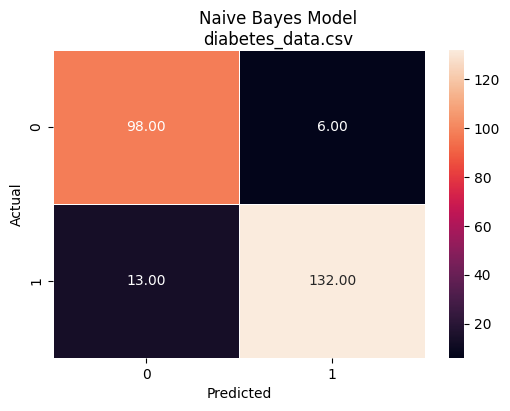

In [16]:
# Visualize Split Set

fig = plt.figure(figsize=(6,4))
fig.suptitle(f"Naive Bayes Model\n{file_name}")
ax = sns.heatmap(cm_split, annot=True, fmt=".2f", linewidth=.5)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(y_label_classes)
ax.set_yticklabels(y_label_classes)
plt.show()